In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 10

In [4]:
arr = np.zeros((N, N))

In [5]:
di = np.diag_indices(N)

In [6]:
#colormap

In [7]:
di

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [8]:
di2 = ((di[0] + 1)[:N - 1], np.flip(di[1])[:N - 1])

In [9]:
di2

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([9, 8, 7, 6, 5, 4, 3, 2, 1]))

In [10]:
np.flip(np.arange(9) + 1)

array([9, 8, 7, 6, 5, 4, 3, 2, 1])

In [11]:
arr[di2] = np.arange(9) + 1

In [12]:
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0., 0., 0., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 0., 0., 0., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 6., 0., 0., 0., 0., 0.],
       [0., 0., 0., 7., 0., 0., 0., 0., 0., 0.],
       [0., 0., 8., 0., 0., 0., 0., 0., 0., 0.],
       [0., 9., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [13]:
di

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [14]:
arr[di]

array([0., 0., 0., 0., 0., 5., 0., 0., 0., 0.])

In [15]:
np.arange(9) + 1

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
N = 100
Edge = np.pi


x = np.linspace(-Edge, Edge, N, endpoint=False)
y = np.linspace(-Edge, Edge, N, endpoint=False)
Y, X = np.meshgrid(x, y)

In [17]:
Z = np.sin(np.sqrt(X**2 + Y**2))

In [18]:
def add_gauss_noise(z, perc, N):
    ampl = abs(z.max() - z.min()) * perc
    return z + ampl * np.random.randn(N, N)

In [19]:
def add_poiss_noise(z, perc, N):
    ampl = abs(z.max() - z.min()) * perc
    return z + ampl * np.random.poisson(1, (N, N))

In [20]:
u1 = add_gauss_noise(Z, 0.05, N)

In [21]:
u2 = add_poiss_noise(Z, 0.05, N)

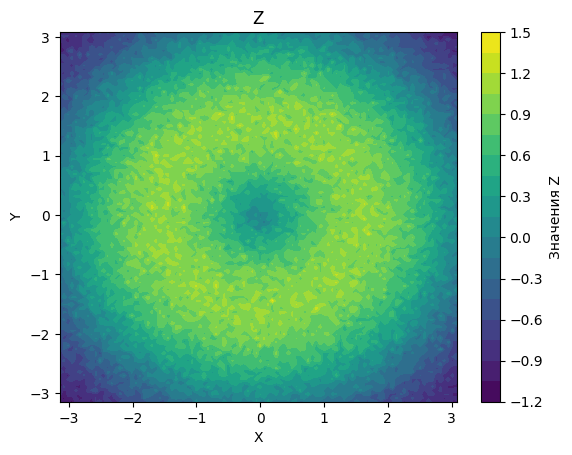

In [22]:
Z = np.sin(np.sqrt(X**2 + Y**2))

#plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, u1, levels=20, cmap='viridis')

cbar = plt.colorbar(contour)
cbar.set_label('Значения Z')

plt.title('Z')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

In [23]:
arr = np.array([[Z, u1, abs(Z - u1)], [Z, u2, abs(Z - u2)]])

In [24]:
arr_names = np.array([['Z', 'u1', '|Z - u1|'], ['Z', 'u2', '|Z - u2|']])

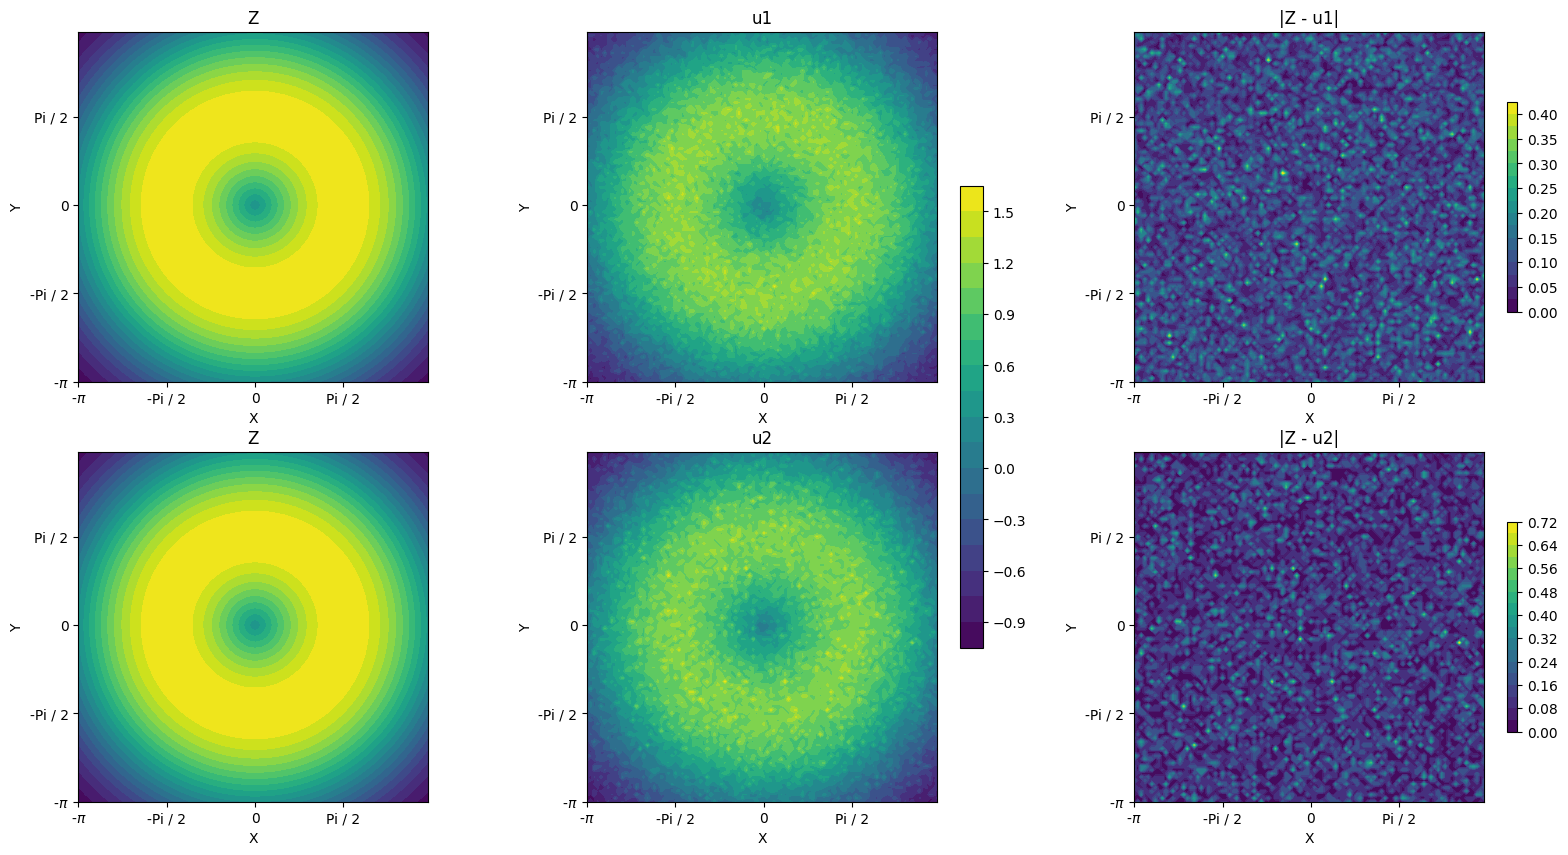

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for col in range(3):
    for row in range(2):
        ax = axs[row, col]
        #pcm = ax.pcolormesh(arr[row, col])
        pcm = ax.contourf(X, Y, arr[row, col], levels = 20)
        ax.set_title(arr_names[row, col])
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_aspect('equal')
        labels = ['-$\pi$', '-Pi / 2', '0', 'Pi / 2']

        ax.set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2])
        ax.set_xticklabels(labels)
        ax.set_yticks([-np.pi, -np.pi / 2, 0, np.pi / 2])
        ax.set_yticklabels(labels)
        if (col == 2):
            fig.colorbar(pcm, ax=axs[row, col], shrink=0.6)
    if col == 1:
        fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)

plt.show()

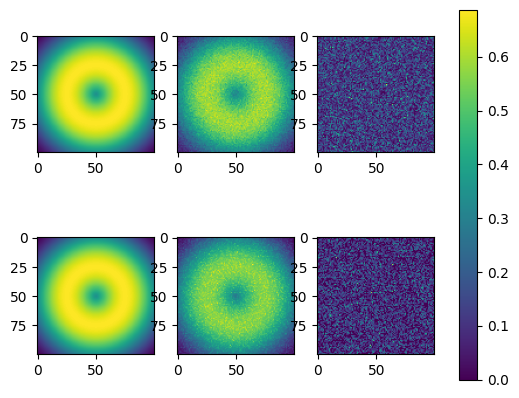

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=3)

ind = 0
for ax in axes.flat:
    if (ind == 0 or ind == 3):
        im = ax.imshow(Z)
    elif (ind == 1):
        im = ax.imshow(u1)
    elif (ind == 4):
        im = ax.imshow(u2)
    elif (ind == 2):
        im = ax.imshow(abs(Z - u1))
    elif (ind == 5):
        im = ax.imshow(abs(Z - u2))
    ind += 1

fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()